In [2]:
import torch
import torchvision

from torchvision.datasets import ImageFolder
from torch.utils.data import Dataset, DataLoader, random_split

from torchvision import transforms
from torchvision.transforms import v2

import os
import json
import matplotlib.pyplot as plt
import numpy as np

from PIL import Image

In [3]:
class MnistDtatset(Dataset):
    def __init__(self, path, transform=None):
        self.path = path
        self.transform = transform
        self.info_cls = "info"
        self.len_dataset = 0
        self.data_list = []
        if path.split("\\")[-1] == "training":
            for path_dir, dir_list, file_list in os.walk(path):
                if path_dir == path:
                    self.classes = dir_list
                    self.class_to_idx = {
                            cls_name : i for i, cls_name in enumerate(self.classes)
                        } 
                    continue
                    
                cls = path_dir.split("\\")[-1]
                
                for name_file in file_list:
                    file_path = os.path.join(path_dir, name_file)
                    self.data_list.append((file_path, self.class_to_idx[cls]))
    
                self.len_dataset += len(file_list)
        elif path.split("\\")[-1] == "testing":
            for path_dir, dir_list, file_list in os.walk(path):
                cls = path_dir.split("\\")[-1]
                for num, name_file in enumerate(file_list):
                    file_path = os.path.join(path_dir, name_file)
                    self.data_list.append((file_path, num))
                self.len_dataset += len(file_list)
                
            
    def __len__(self):
        return self.len_dataset
        
    def __getitem__(self, index):
        file_path, target = self.data_list[index]
        sample = np.array(Image.open(file_path))

        if self.transform is not None:
            sample = self.transform(sample)
        return sample, target
        

In [4]:
# p = r"C:\Users\voron\IT\pytorch\mnist\training"
# # p = r"C:\Users\voron\IT\pytorch\mnist\testing"
# for dir_path, dir_file, file in os.walk(p):
#     print("dir_path: ", dir_path)
#     print("dir_file: ", dir_file)
#     print("file: ", len(file))
#     print("*"*20)

In [5]:
path_train = r"C:\Users\voron\IT\pytorch\data\training"
path_test = r"C:\Users\voron\IT\pytorch\data\testing"

In [6]:
train_data = MnistDtatset(path_train)
test_data = MnistDtatset(path_test)

In [7]:
print(f"длина тренировочного сета: {len(train_data)}")
print(f"длина тренировочного сета: {len(test_data)}")

длина тренировочного сета: 60000
длина тренировочного сета: 10000


In [8]:
print(train_data.classes)


['class_0', 'class_1', 'class_2', 'class_3', 'class_4', 'class_5', 'class_6', 'class_7', 'class_8', 'class_9']


In [9]:
train_data.class_to_idx

{'class_0': 0,
 'class_1': 1,
 'class_2': 2,
 'class_3': 3,
 'class_4': 4,
 'class_5': 5,
 'class_6': 6,
 'class_7': 7,
 'class_8': 8,
 'class_9': 9}

In [10]:
for cls, one_hot_position in train_data.class_to_idx.items():
    one_hot_vector = [(i == one_hot_position)*1 for i in range(10)]
    print(f"\033[32m{cls}\033[0m => \033[34m{one_hot_vector}\033[0m")

class_0 => [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
class_1 => [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
class_2 => [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
class_3 => [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
class_4 => [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
class_5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
class_6 => [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
class_7 => [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
class_8 => [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
class_9 => [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


In [11]:
train_data.classes[4]

'class_4'

класс:  class_5


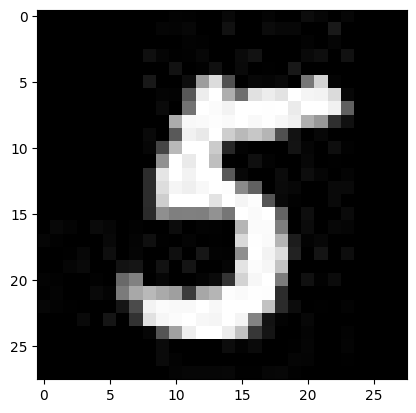

In [12]:
img, ohp = train_data[33022]
cls = train_data.classes[ohp]
print("класс: ",cls)
plt.imshow(img, cmap="grey")

In [13]:
train_data, valid_data = random_split(train_data, [0.8, 0.2])

In [14]:
bach_size = 16
train_loader = DataLoader(train_data, bach_size, shuffle=True)
valid_loader = DataLoader(valid_data, bach_size, shuffle=False)
test_loader = DataLoader(test_data, bach_size, shuffle=False)


In [15]:
np.array(train_data[4][0]).shape

(28, 28)

In [16]:
c = 0
for i in test_data:
    if c < 4:
        print(torch.tensor(np.array(i[0])).shape)
        c += 1
    else:
        break

torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])


In [17]:
for i, (sample, target) in enumerate(test_loader):
    if i < 3:
        print(f"номер bach: {i + 1}")
        print(f"размер sample: ", sample.shape)
        print(f"размер target: ", target.shape)
    
print("....")
print(f"номер bach: {i + 1}")
print(f"размер sample: ", sample.shape)
print(f"размер target: ", target.shape)
    

номер bach: 1
размер sample:  torch.Size([16, 28, 28])
размер target:  torch.Size([16])
номер bach: 2
размер sample:  torch.Size([16, 28, 28])
размер target:  torch.Size([16])
номер bach: 3
размер sample:  torch.Size([16, 28, 28])
размер target:  torch.Size([16])
....
номер bach: 625
размер sample:  torch.Size([16, 28, 28])
размер target:  torch.Size([16])


# ImageFolder

In [18]:
transform = v2.Compose(
    [
        v2.ToImage(),
        v2.Grayscale(),
        v2.ToDtype(torch.float32, scale=True),
        v2.Normalize(mean=(0.5, ), std=(0.5, ))
    ]
)

In [19]:
train_data = ImageFolder(path_train, transform=transform)
test_data = ImageFolder(path_test, transform=transform)

In [20]:
bach_size = 16
train_loader = DataLoader(train_data, bach_size, shuffle=True)
valid_loader = DataLoader(valid_data, bach_size, shuffle=False)
test_loader = DataLoader(test_data, bach_size, shuffle=False)


In [21]:
for i, (sample, target) in enumerate(test_loader):
    if i < 3:
        print(f"номер bach: {i + 1}")
        print(f"размер sample: ", sample.shape)
        print(f"размер target: ", target.shape)
        print(f"min-- {sample.min()}, max-- {sample.max()}")
    
print("....")
print(f"номер bach: {i + 1}")
print(f"размер sample: ", sample.shape)
print(f"размер target: ", target.shape)
print(f"min-- {sample.min()}, max-- {sample.max()}")
    

номер bach: 1
размер sample:  torch.Size([16, 1, 28, 28])
размер target:  torch.Size([16])
min-- -1.0, max-- 0.992156982421875
номер bach: 2
размер sample:  torch.Size([16, 1, 28, 28])
размер target:  torch.Size([16])
min-- -1.0, max-- 0.992156982421875
номер bach: 3
размер sample:  torch.Size([16, 1, 28, 28])
размер target:  torch.Size([16])
min-- -1.0, max-- 0.992156982421875
....
номер bach: 625
размер sample:  torch.Size([16, 1, 28, 28])
размер target:  torch.Size([16])
min-- -1.0, max-- 0.992156982421875
